# Import Packages

In [1]:
import csv
#import pandas as pd
#import os, re
import nltk
import sklearn
import numpy as np
import matplotlib.pyplot as mplt
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zionj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zionj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Read Data from TSV

In [2]:
data_file = 'training_set_rel3.csv'
with open(data_file, 'r', encoding='utf-8') as raw_obf:
    raw_data_no_form = csv.reader(raw_obf)
    raw_data_list = list(raw_data_no_form)
    raw_data_list.pop(0)
    essay_list = []
    for row_col in raw_data_list:
        new_dict = { "essay_id": row_col[0], "essay_set": row_col[1], "essay": row_col[2],'essay_stemmed':'', "domain1_score": row_col[3], "domain2_score": row_col[4], "unique_words": 0, "avg_words": 0, "filler_words": 0, "avg_domain": 0,}
        essay_list.append(new_dict)
    print(essay_list[0])

{'essay_id': '1', 'essay_set': '1', 'essay': "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the comput

# Preprocessing Data

In [3]:
for row in essay_list:
    essay_txt = row['essay']
    essay_txt = essay_txt.lower()
    essay_txt.replace("@[A-Z]+[1-9]?", " ")
    #essay_txt.replace("@[A-Z]+[1-9]?'s"," ")
    essay_words = nltk.word_tokenize(essay_txt)
    temp_list = []
    for word in essay_words:
        temp_list.append(PorterStemmer().stem(word))
    essay_words_stemmed = temp_list
    row.update({'essay': essay_txt, 'essay_stemmed': essay_words_stemmed})

# Extract Features from Dataset

In [4]:
# declare average variables
avg_of_uniq_words = 0
avg_of_words = 0
avg_of_filler_words = 0

# calculate the average unique words
for row in essay_list:
    essay_txt = row['essay']
    temp_essay_list = essay_txt.split(' ')
    num_of_uniq_words = len(Counter(temp_essay_list))
    row['unique_words'] = num_of_uniq_words
    avg_of_uniq_words = avg_of_uniq_words + num_of_uniq_words
avg_of_uniq_words = avg_of_uniq_words / len(essay_list)
print('completed unique words')

# calculate the word count in each essay
for row in essay_list:
    essay_txt = row['essay']
    temp_list = essay_txt.split(' ')
    num_of_words = len(temp_list)
    row['avg_words'] = num_of_words
    avg_of_words = avg_of_words + num_of_words
avg_of_words = avg_of_words / len(essay_list)
print('completed word count')

# calculate number of stopwords/filler words
for row in essay_list:
    essay_txt = row['essay']
    temp_tokens = word_tokenize(essay_txt)
    stopwords_x = [w for w in temp_tokens if w in sw.words('English')]
    row['filler_words'] = len(stopwords_x)
    avg_of_filler_words = avg_of_filler_words + len(stopwords_x)
avg_of_filler_words = avg_of_filler_words / len(essay_list)
print('completed filler words')

# calculate Domain score
for row in essay_list:
    avg_domain_score = 0
    domains_added = 0

    if row['domain1_score'] != '':
        avg_domain_score += int(row['domain1_score'])
        domains_added += 1

    if row['domain2_score'] != '':
        avg_domain_score += int(row['domain2_score'])
        domains_added += 1

    if domains_added > 0:
        row['avg_domain'] = avg_domain_score / domains_added
    else:
        print(row)
        row['avg_domain'] = 0
print('completed domain scores')

completed unique words
completed word count
completed filler words
{'essay_id': '10534', 'essay_set': '4', 'essay': "when they come back, saeng vowed silently to herself, in the spring, when the snows melt and the geese return and this hibiscus is budding; then i will take that test again. the author concludes this story winter hibiscus with this paragraph because in the story it's about saeng and she fails her drivers test, and notice a familiar plant which causes her to go to a florist shop. as saeng learns about this familian plant it encourages her to retake that drivers test, to where as though the snow is gone and the sun is shining.\t1\t1\t\t1\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t", 'essay_stemmed': ['when', 'they', 'come', 'back', ',', 'saeng', 'vow', 'silent', 'to', 'herself', ',', 'in', 'the', 'spring', ',', 'when', 'the', 'snow', 'melt', 'and', 'the', 'gees', 'return', 'and', 'thi', 'hibiscu', 'is', 'bud', ';', 'then', 'i', 'will', 'take', 'that', 'test', 'again', '.', '

# Plot Feature Extraction Results

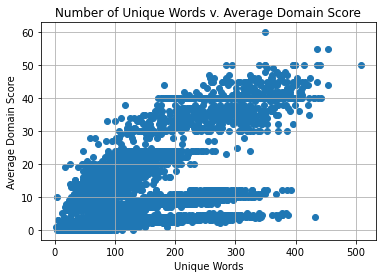

In [5]:
# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['unique_words'])
    y_values.append(row['avg_domain'])

#plot unique words
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Unique Words v. Average Domain Score')
mplt.xlabel('Unique Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

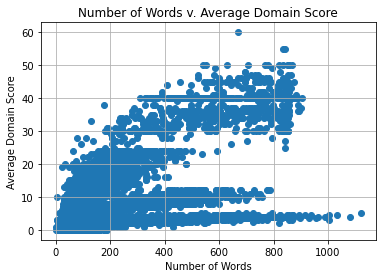

In [6]:
# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['avg_words'])
    y_values.append(row['avg_domain'])

#plot Word Count
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Words v. Average Domain Score')
mplt.xlabel('Number of Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

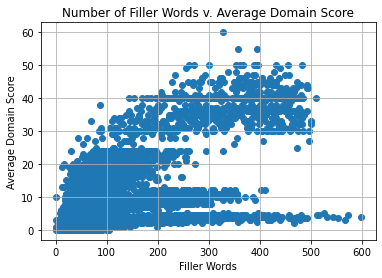

In [8]:
# prepare x & y axis values
x_values = []
y_values = []

for row in essay_list:
    x_values.append(row['filler_words'])
    y_values.append(row['avg_domain'])

#plot unique words
mplt.scatter(x_values, y_values, marker='o')
mplt.title('Number of Filler Words v. Average Domain Score')
mplt.xlabel('Filler Words')
mplt.ylabel('Average Domain Score')
mplt.grid()
mplt.show()

# Train/Test Model

# Grade Essay

# Plagiarism Checker

# Export Results